In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
dataset = pd.read_csv('Salary_dataset.csv')

In [23]:
dataset

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


## Data Cleaning

In [25]:
dataset.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [26]:
dataset.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


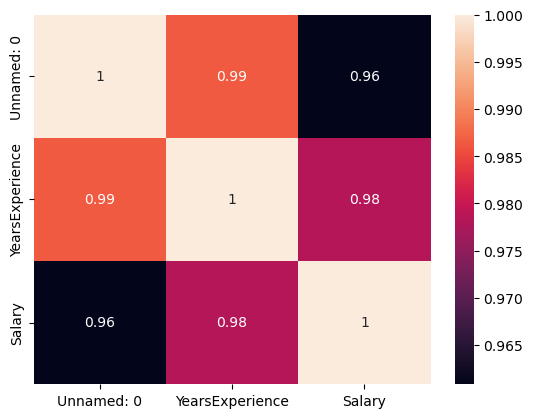

In [27]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

## Divide Our Dataset into Dependent and Independent

In [28]:
X = dataset[['YearsExperience']] ## Independent Features
y = dataset['Salary']  ## Dependent Features

In [29]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [30]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21, 1), (21,), (9, 1), (9,))

In [34]:
X_train

,YearsExperience
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0
1,1.4
2,1.6
25,9.1


## Model Training

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train, y_train)

LinearRegression()

In [38]:
## Slope or Coefficient
regression.coef_

array([9339.08172382])

In [39]:
## Intercept
regression.intercept_

24985.53016251169

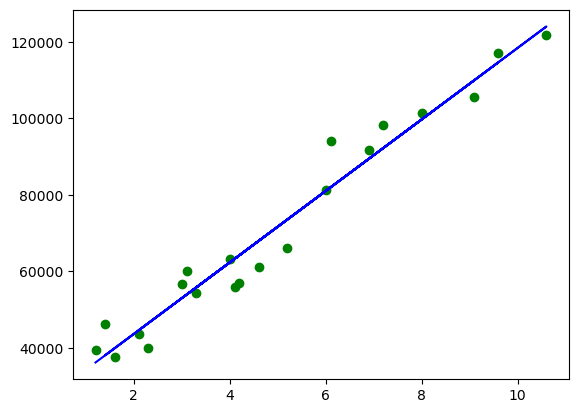

In [40]:
plt.scatter(X_train, y_train, c='g')
plt.plot(X_train, regression.predict(X_train), c='b')
plt.show()

In [41]:
## Prediction for the test data
y_pred = regression.predict(X_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [42]:
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

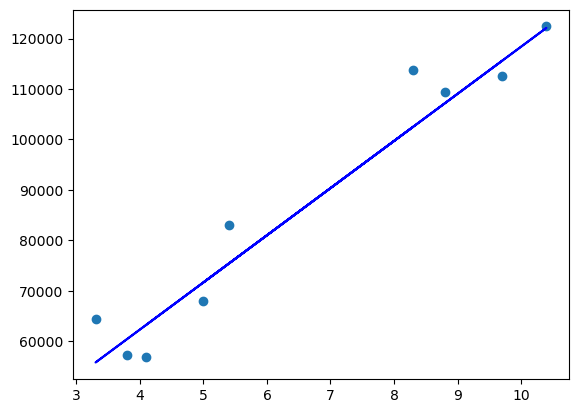

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test), 'b')
plt.show()

## Model Accuracy

In [44]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

37784662.46621308
5161.328710400178
6146.9230079945755


In [45]:
## R squate and adjusted R square

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9414466227178215


In [46]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9330818545346532

In [56]:
## new data point YearsExperience 7

# scaled_YearsExperience = scaler.transform([[7]])
# scaled_YearsExperience

## Assumption

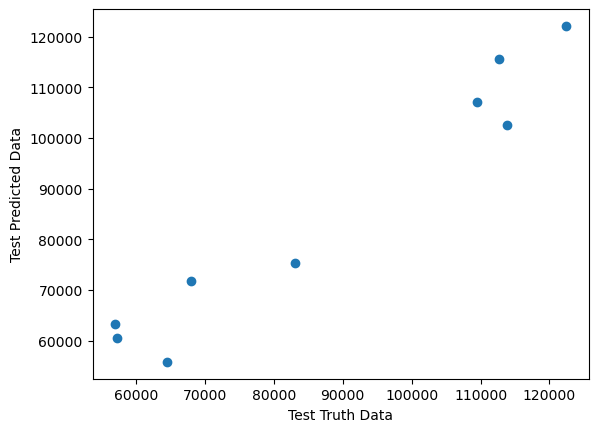

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
plt.show()

In [49]:
residuals = y_test - y_pred

In [50]:
residuals

27    -2938.622884
15    -3741.938782
23    11313.091530
17     7672.428529
8      8641.500149
9     -3284.040713
28      280.019910
24     2262.550668
12    -6317.765230
Name: Salary, dtype: float64

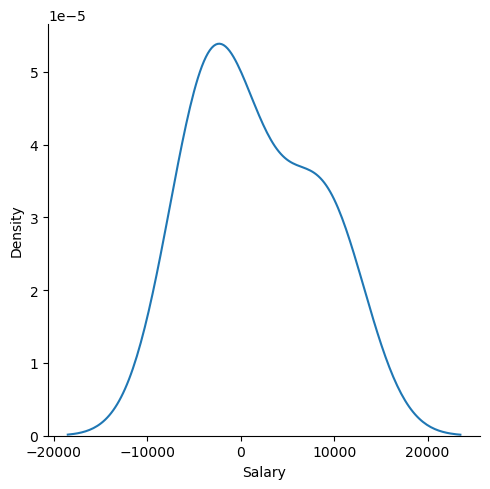

In [51]:
sns.displot(residuals, kind="kde")
plt.show()

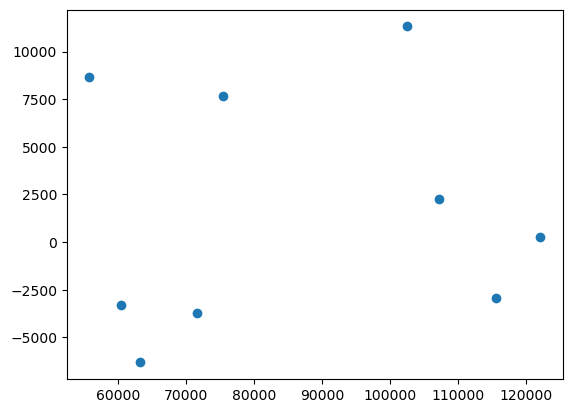

In [52]:
## Scatter plot with prediction and residual
## uniform distribution
plt.scatter(y_pred, residuals,)
plt.show()

In [53]:
## Pickling
import pickle
pickle.dump(regression, open('salary.pkl', 'wb'))

In [54]:
pickle.load(open('salary.pkl', 'rb'))

LinearRegression()